# Applied Machine Learning: Unsupervised Learning

## Preamble and Datasets

In [3]:
%matplotlib notebook

In [4]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

In [8]:
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height','color_score']]
y_fruits = fruits[['fruit_label']] - 1

## Dimensionality Reduction and Manifold Learning
### Principal Components Analysis (PCA)
#### Using PCA to find the first two principal components of the breast cancer dataset

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

In [12]:
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


#### Plotting the magnitude of each feature value for the first two principal components

<IPython.core.display.Javascript object>


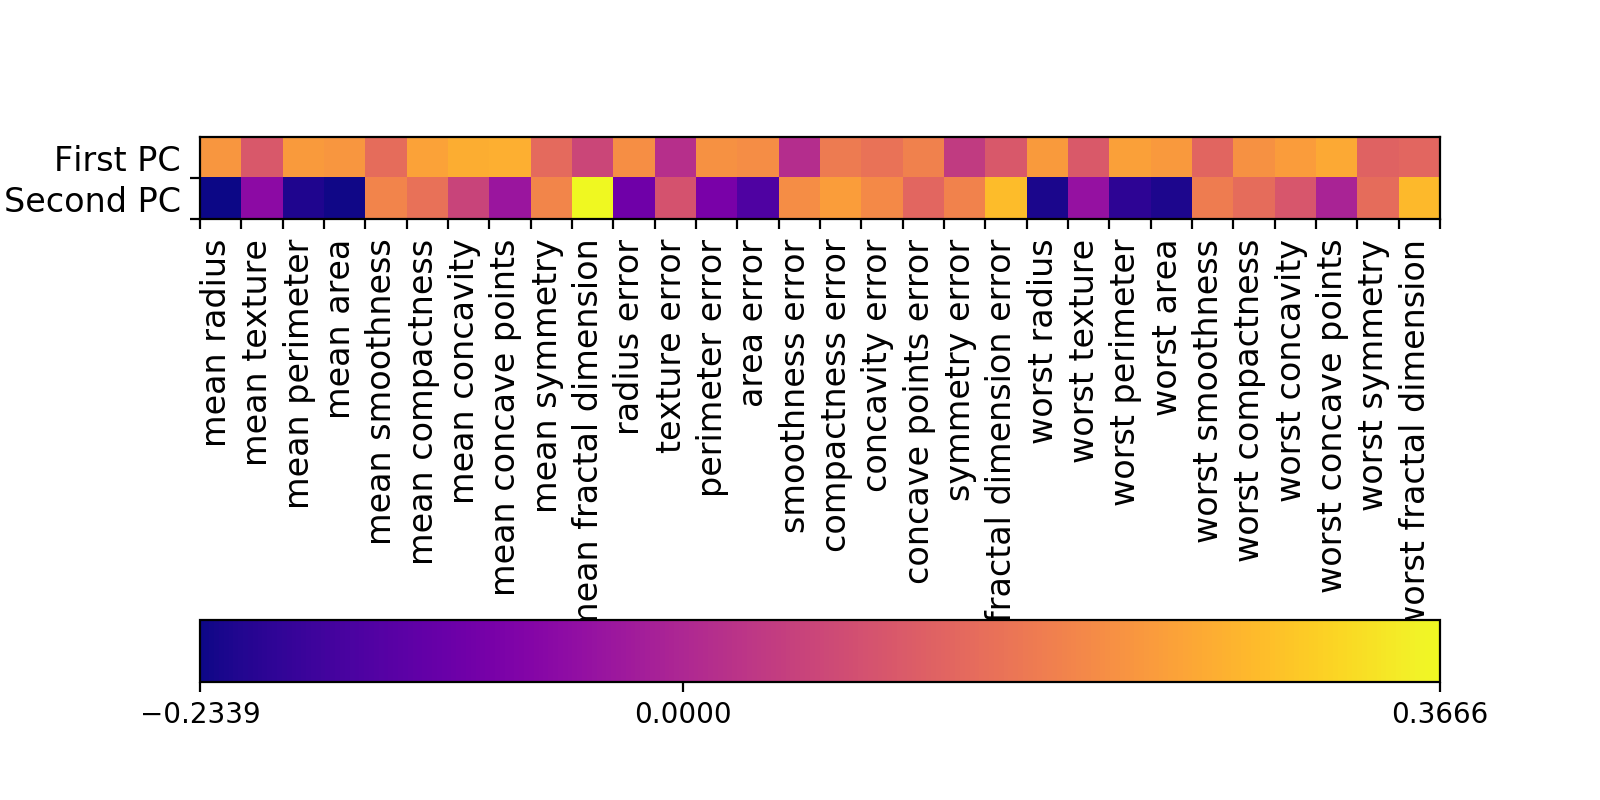

In [19]:
fig = plt.figure(figsize=(8,4))
plt.imshow(pca.components_,interpolation='none',cmap='plasma')
feature_names=list(cancer.feature_names)
plt.gca().set_xticks(np.arange(-.5,len(feature_names)))
plt.gca().set_yticks(np.arange(0.5,2))
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12)
plt.gca().set_yticklabels(['First PC','Second PC'], va='bottom', fontsize=12)
plt.colorbar(orientation = 'horizontal', ticks = [pca.components_.min(),0,pca.components_.max()], pad=0.65)


#### PCA on the fruit dataset (for comparison)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

##### Too much of this week's notes rely on'adspy_shared_utilities', which is outdated and couldn't be of use here. 

### Manifold learning methods

#### Multidimensional scaling (MDS) on the fruit dataset

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)
mds= MDS(n_components=2)
X_fruits_mds = mds.fit_transform(X_fruits_normalized)

#### Multidimensional scaling (MDS) on the breast cancer dataset

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)

mds= MDS(n_components=2)

X_mds = mds.fit_transform(X_normalized)

#### t-SNE on the breast cancer dataset

In [27]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0)
X_tsne= tsne.fit_transform(X_normalized)

## Clustering
### K-means

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=10)

kmeans= KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height','color_score']]
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_fruits_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Agglomerative clustering

In [31]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

X, y = make_blobs(random_state = 10)
cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)

#### Creating a dendrogram (using scipy)


In [32]:
X, y = make_blobs(random_state=10,n_samples=10)
X

array([[  5.69192445,  -9.47641249],
       [  1.70789903,   6.00435173],
       [  0.23621041,  -3.11909976],
       [  2.90159483,   5.42121526],
       [  5.85943906,  -8.38192364],
       [  6.04774884, -10.30504657],
       [ -2.00758803,  -7.24743939],
       [  1.45467725,  -6.58387198],
       [  1.53636249,   5.11121453],
       [  5.4307043 ,  -9.75956122]])

<IPython.core.display.Javascript object>


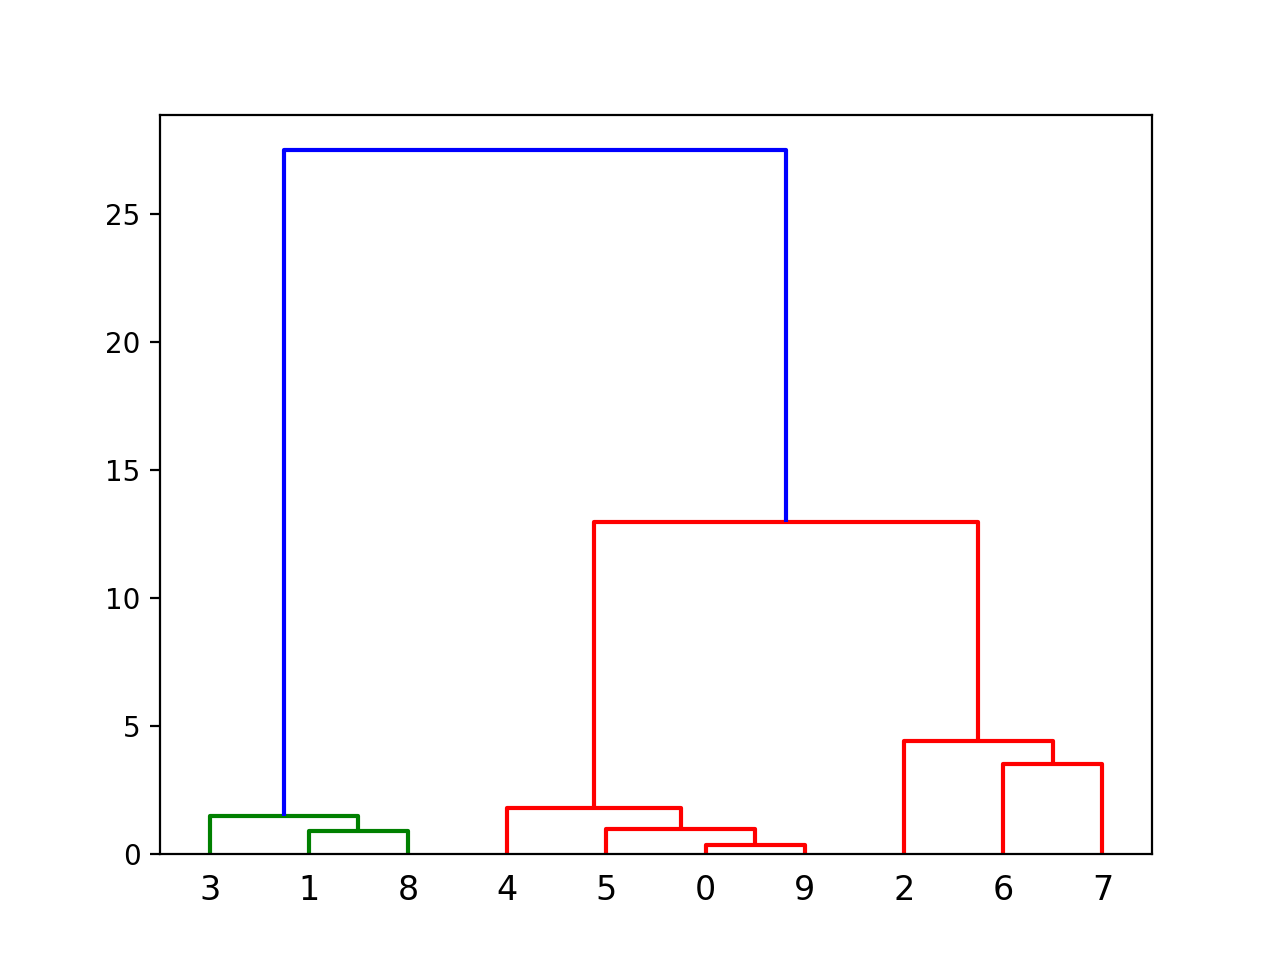

In [35]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(X))
plt.show()

### DBSCAN clustering

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X,y = make_blobs(random_state=9, n_samples=25)
dbscan = DBSCAN(eps=2,min_samples=2)
cls=dbscan.fit_predict(X)
cls

array([ 0,  1,  0,  2,  0,  0,  0,  2,  2, -1,  1,  2,  0,  0, -1,  0,  0,
        1, -1,  1,  1,  2,  2,  2,  1])